In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load dataset
data = pd.read_csv('SPAM.csv')

# Preprocess labels (encode ham and spam)
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

In [13]:
# Tokenize the text messages
max_words = 5000  # Define the number of unique words to consider
max_len = 100     # Maximum sequence length for padding

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Message'])
sequences = tokenizer.texts_to_sequences(data['Message'])
X = pad_sequences(sequences, maxlen=max_len)

# Define labels
y = data['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model architecture
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))

# Batch Normalization
model.add(BatchNormalization())

# Dense layer with Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an Adam optimizer and learning rate adjustments
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/20


C:\Users\lahir\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - accuracy: 0.7532 - loss: 0.4483 - val_accuracy: 0.8756 - val_loss: 0.4473 - learning_rate: 0.0010
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9780 - loss: 0.0732 - val_accuracy: 0.9327 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.9912 - loss: 0.0314 - val_accuracy: 0.9619 - val_loss: 0.2296 - learning_rate: 0.0010
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9944 - loss: 0.0201 - val_accuracy: 0.9697 - val_loss: 0.1673 - learning_rate: 0.0010
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.9977 - loss: 0.0130 - val_accuracy: 0.9776 - val_loss: 0.1180 - learning_rate: 0.0010
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9832 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accura

Accuracy:  0.9883408071748879
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



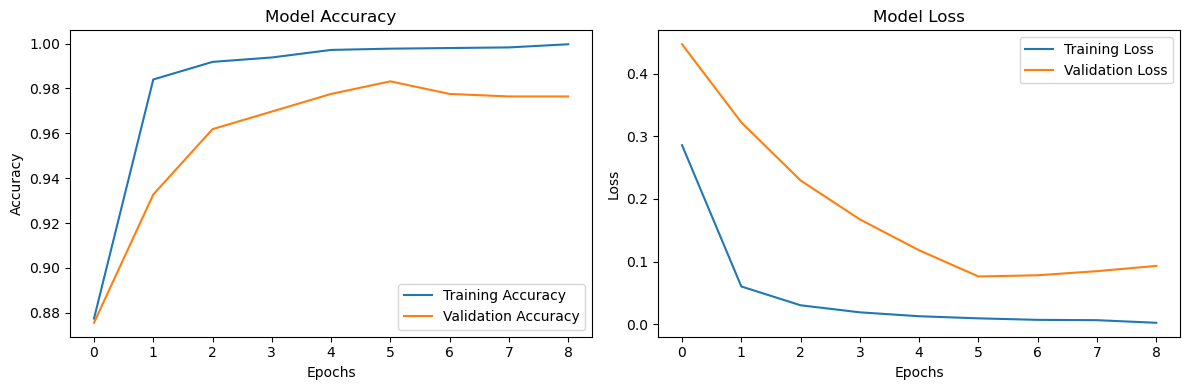

In [21]:
# Performance report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Save the model to a file
model.save('smishing_detection_model.h5')

# Load the model from a file
loaded_model = load_model('smishing_detection_model.h5')

# Evaluate the loaded model
y_pred_loaded = (loaded_model.predict(X_test) > 0.5).astype("int32")
print("Loaded Model Accuracy: ", accuracy_score(y_test, y_pred_loaded))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Loaded Model Accuracy:  0.9883408071748879
